In [2]:
import numpy as np
from skimage.io import imread
import napari

In [3]:
# Read the images
image1 = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xy_8bit__nuclei_without_offset.tif')
image2 = imread('https://github.com/NEUBIAS/training-resources/raw/master/image_data/xy_8bit__nuclei_with_offset.tif')

In [15]:
# Inspect image data type and values
print(image1.dtype, image1.shape, np.min(image1), np.max(image1))
print(image2.dtype, image2.shape, np.min(image2), np.max(image2))

uint8 (96, 97) 3 203
uint8 (104, 116) 27 137

 Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



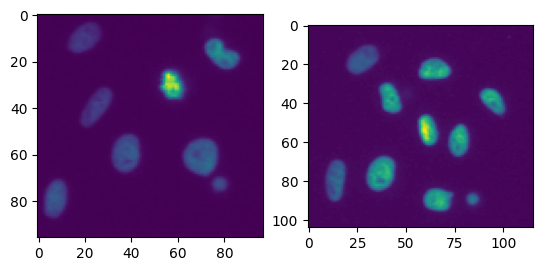

In [9]:
# Visualize images using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].imshow(image1)
ax[1].imshow(image2)


 Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------



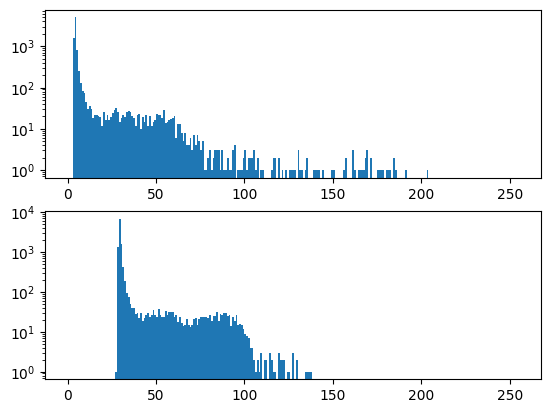

In [22]:
# Explore the histograms
info_type = np.iinfo(image1.dtype)
print('\n', info_type)
min_val = info_type.min
max_val = info_type.max

fig, ax = plt.subplots(2,1)
h = ax[0].hist(image1.flatten(), bins=np.arange(max_val+1), log=True)
h = ax[1].hist(image2.flatten(), bins=np.arange(max_val+1), log=True)

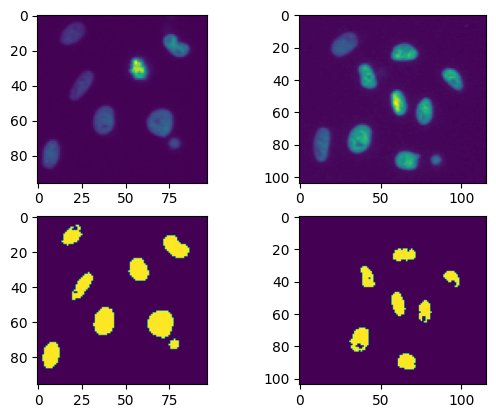

In [24]:
# Try manual thresholding
thr1 = 25
thr2 = 75

fig, ax = plt.subplots(2,2)
ax[0,0].imshow(image1)
ax[0,1].imshow(image2)
ax[1,0].imshow(image1>thr1)
ax[1,1].imshow(image2>thr2)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


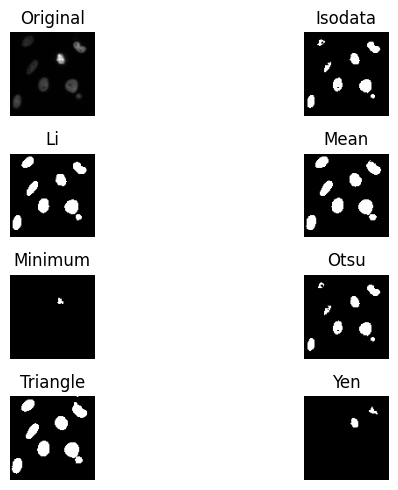

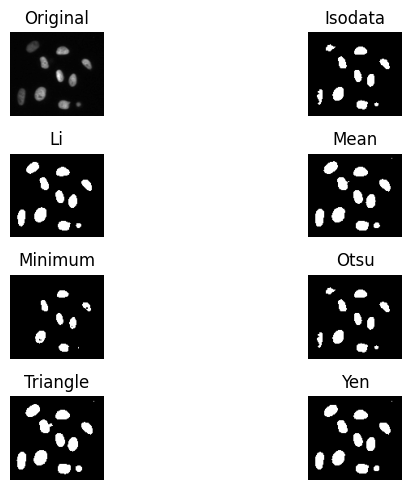

In [35]:
# Explore the automatic thresholds available in skimage
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(image1, verbose=True)
fig, ax = try_all_threshold(image2, verbose=False)

In [36]:
# Obtain the thresholding values
from skimage.filters import threshold_mean
thr1 = threshold_mean(image1)
print(thr1)
thr2 = threshold_mean(image2)
print(thr2)

9.543921821305842
34.323027188328915
